# ADS Project 3 Group 4

## Libraries and Settings

In [1]:
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
from PIL import Image

In [2]:
"""
Path
"""
DATA_PATH = "../data/train_set"
IMAGE_FOLDER = os.path.join(DATA_PATH, "images")
POINTS_FOLDER = os.path.join(DATA_PATH, "points")
LABELS_FOLDER = DATA_PATH

## Read Training Data

In [45]:
def read_all_images():
    """
    Read 2500 training images from the IMAGE_FOLDER
    :return a 4d numpy array in form of (index, height, width, channels), channels is RGB 
    """
    files = [file for file in os.listdir(IMAGE_FOLDER) if file.endswith('.jpg')]
    files.sort()
    
    face_images = np.zeros((len(files), 750, 1000, 3))
    
    for index, filename in enumerate(files):
        face_img_arr = plt.imread(os.path.join(IMAGE_FOLDER, filename))
        if face_img_arr.shape != (750,1000,3):
            # resize the image
            face_img = Image.fromarray(face_img_arr)
            face_img = face_img.resize((1000,750))
            face_img_arr = np.array(face_img)
        face_images[index] = face_img_arr
    return face_images

def read_labels():
    """
    Read the image labels from the label.csv file
    :return a pandas.DataFrame with 3 columns: 'emotion_idx','emotion_cat','type'
    """
    labels_df = pd.read_csv(os.path.join(LABELS_FOLDER, 'label.csv'))
    labels_df = labels_df.loc[:,['emotion_idx','emotion_cat','type']]
    return labels_df
    

def read_all_points():
    """
    Read all face coordinates points
    :return a tuple of shape (2500, 78, 2). Because for each of 2500 images there are 78 points associated with it
    """
    files = [file for file in os.listdir(POINTS_FOLDER) if file.endswith('.mat')]
    files.sort()
    
    face_points = np.zeros((len(files), 78, 2))
    for index, filename in enumerate(files):
        face_points_dict = loadmat(os.path.join(POINTS_FOLDER, filename))
    
        face_points[index] = face_points_dict.get('faceCoordinatesUnwarped',  face_points_dict.get('faceCoordinates2'))
    return face_points

def load_data(loadImage = False):
    """
    Load training data from local files
    
    :loadImage if it's False, this function will not load original images
    :return a tuple (images, points, labels)
        if loadImage is False, the 'images' will None. Otherwise its a numpy array with shape (2500,750,1000,3)
        points is a numpy array with shape (2500, 78, 2)
        labels is a pandas.DataFrame
    """
    face_images_narr =  read_all_images() if loadImage else None
    face_images_points = read_all_points()
    labels = read_labels()
    return face_images_narr, face_images_points, labels

def show_image(index, all_images = None):
    """
    Display the (index)th image.
    all_images is passed, the this image numpy array can be easily retrieved from it. 
    Otherwise the original images needs to be read from disk
    
    :index the index to specify which image to disply
    :all_images the return value of 'read_all_images' function
    """
    if all_images is not None and index < len(all_images):
        face_img_arr = all_images[index].astype('uint8')
        
    else:
        face_img_arr = plt.imread(os.path.join(IMAGE_FOLDER, f"{index:04}.jpg"))
    plt.imshow(face_img_arr)
    plt.show()
    return 


In [4]:
# pass True if you want to read original images, it might take some time to do it
images, points, labels = load_data(True)

In [5]:
if images:
    print(images.shape)

print(points.shape)
labels

(2500, 750, 1000, 3)
(2500, 78, 2)


,emotion_idx,emotion_cat,type
0,1,Neutral,simple
1,1,Neutral,simple
2,1,Neutral,simple
3,1,Neutral,simple
4,1,Neutral,simple
...,...,...,...
2495,22,Sadly disgusted,compound
2496,22,Sadly disgusted,compound
2497,22,Sadly disgusted,compound
2498,22,Sadly disgusted,compound


In [23]:
i1 = Image.fromarray(images[0].astype('uint8'))
# images[0].shape
# Image.fromarray?
# face_img_arr = plt.imread(os.path.join(IMAGE_FOLDER, '0001.jpg'))
# face_img_arr.dtype


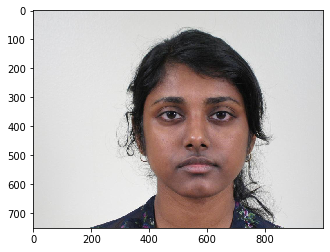